# Proyecto 4

Carmen Lozano López, María Victoria Rodríguez del Corral y María Millán Gordillo.

El objetivo principal del presente proyecto es recorrer un problema de aprendizaje supervisado de punta a punta simulando un proyecto real. El objetivo del desafío es llegar a la predicción de los valores de emisión de CO2 de los motores en función de sus características. Para llegar a esa predicción se estructurará el proyecto en las etapas típicas de un proyecto de aprendizaje a partir de datos:

1. comprensión del problema
2. estudio de los datos disponibles incluyendo una exploración de los mismos
3. modelado
4. evaluación
5. pasaje a producción




**Referencia:**

https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data

# Acceso a los datos

In [386]:
# download data with gdown
# !gdown --id 1MIswAgCfsWeEaXz4gvLNNwk-jr9EYnBZ

In [1]:
# load csv with pandas
import pandas as pd

df = pd.read_csv('co2.csv')

In [2]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [389]:
# shape and columns
print(df.shape)
df.info()

(7385, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  


# Descripción del problema
*Escriba con sus palabras el problema y los objetivos:*

*El objetivo del proyecto es predecir las emisiones de CO2 de los motores de vehículos en función de sus características. Buscamos entrenar un modelo para que, dado un conjunto de atributos del motor (como por ejemplo el tipo de combustible, cilindrada, tipo de transmisión, etc.), sea capaz de predecir una variable de salida continua, en este caso, la cantidad de CO2 emitido por los motores.
El problema consiste en identificar qué características del motor tienen una relación más fuerte con las emisiones de CO2 y cómo utilizar estos datos para construir un modelo predictivo más robusto.
Para predecir dichas emisiones, necesitaremos explorar y preparar adecuadamente los datos para que el modelo aprenda de manera efectiva,
así como, evaluar y seleccionar el modelo más adecuado para la predicción.*

# Exploración de los datos
Realice una exploración de los datos y documento los hallazgos principales. Esta etapa exploratoria (EDA) es fundamental para comprender los datos y relacionarlos con el problema. Puede tomar como referencia las actividades típicas de esta etapa:

* a) entendimientos de los datos en cuento a cantidad de registros, atributos y tipos de datos
 
* b) extracción de estadísticas descriptivas básicas, revisión de los datos para identificar registros anómalos, datos faltantes o outliers
 
* c) limpieza de datos para resolver los posibles problemas de datos faltantes o inconsistencias
  
* d) exploración de las variables mediante análisis estadístico (histogramas, min, max, etc.) luego de la limpieza

* e) explorar correlaciones entre los atributos y entre los atributos y la clase objetivo

* f) verificación que la calidad de datos es adecuada para cumplir con los objetivoos planteados

* g) documentar los hallazgos alineados con los objetivos (ejemplo: identificando atributos que tienen correlación con la variable objetivo).


In [3]:
print('El dataset cuenta con, ',df.isnull().sum().sum(), 'valores nulos')
print('Los tipos de datos de las columnas son: ')
print(df.dtypes)

El dataset cuenta con,  0 valores nulos
Los tipos de datos de las columnas son: 
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


Como podemos observar no hay nulos, contamos con 5 variables categóricas y 7 numéricas. La variable que queremos predecir CO2 es una variable numérica.

In [4]:
print('Descripción de las variables')
print(df.describe())

Descripción de las variables
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min               

Viendo las variables observamos que las variables Fuel Consumption City, Fuel Consumption Hwy y Fuel Consumption Comb en (L/100 km) rondan en torno a los mismos valores ya que expresan la misma información en distintos dominios. 

También nos hemos dado cuenta de que la variable Fuel Consumption Comb está representada empleando dos tipos de unidades distintas por lo que contamos con información duplicada, por ello consideramos que la variable Fuel Consumption Comb (mpg) es redundante por lo que vamos a eliminarla.

Sobre las variables Engine Size y Cilinders son variables que pueden ser relevantes a la hora de tratar de predecir la variable objetivo. Dado que están en distintas unidades podría ser interesante normalizar los datos.

In [5]:
#eliminamos la variable Fuel Consumption Comb (mpg) ya que como dijimos anteriormente está duplicada pero en distintas unidades.
df=df.drop(['Fuel Consumption Comb (mpg)'], axis=1)

Revisamos si hay datos duplicados y si los hay los eliminamos.

In [6]:
print('El dataset cuenta con, ',df.duplicated().sum(), 'valores duplicados')
df=df.drop_duplicates()

El dataset cuenta con,  1103 valores duplicados


In [7]:
print('Descripción de las variables categóricas')
print(df.describe(include='object'))

Descripción de las variables categóricas
        Make      Model Vehicle Class Transmission Fuel Type
count   6282       6282          6282         6282      6282
unique    42       2053            16           27         5
top     FORD  F-150 FFV   SUV - SMALL          AS6         X
freq     577         32          1006         1139      3039


Contamos con 42 marcas distintas, 2053 modelos distintos, 16 clases de vehiculo, 5 tipos de combustible y 27 tipos de transmisión.

La marca de coche de la que más informacion contamos es FORD, que contamos con 577 vehículos de los 6282 que tenemos, es decir un 9% del dataset. 

Análisis de la variable que queremos predecir.

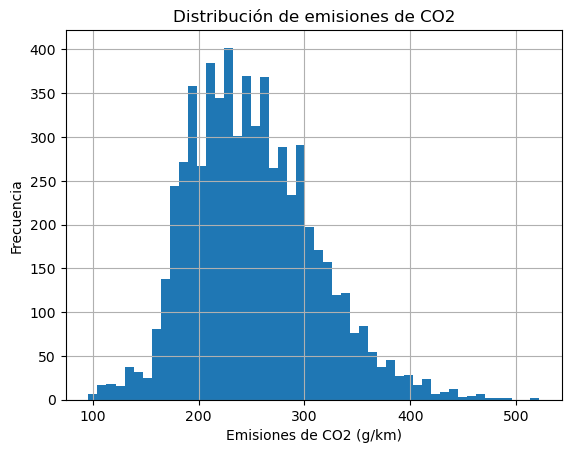

In [8]:
import matplotlib.pyplot as plt
df['CO2 Emissions(g/km)'].hist(bins=50)
plt.title('Distribución de emisiones de CO2')
plt.xlabel('Emisiones de CO2 (g/km)')
plt.ylabel('Frecuencia')
plt.show()

Contamos con muchos registros con valores en torno a 150 y 400 por lo que intuimos que va a ser complejo predecir registros que se encuentren fuera de estos rangos.

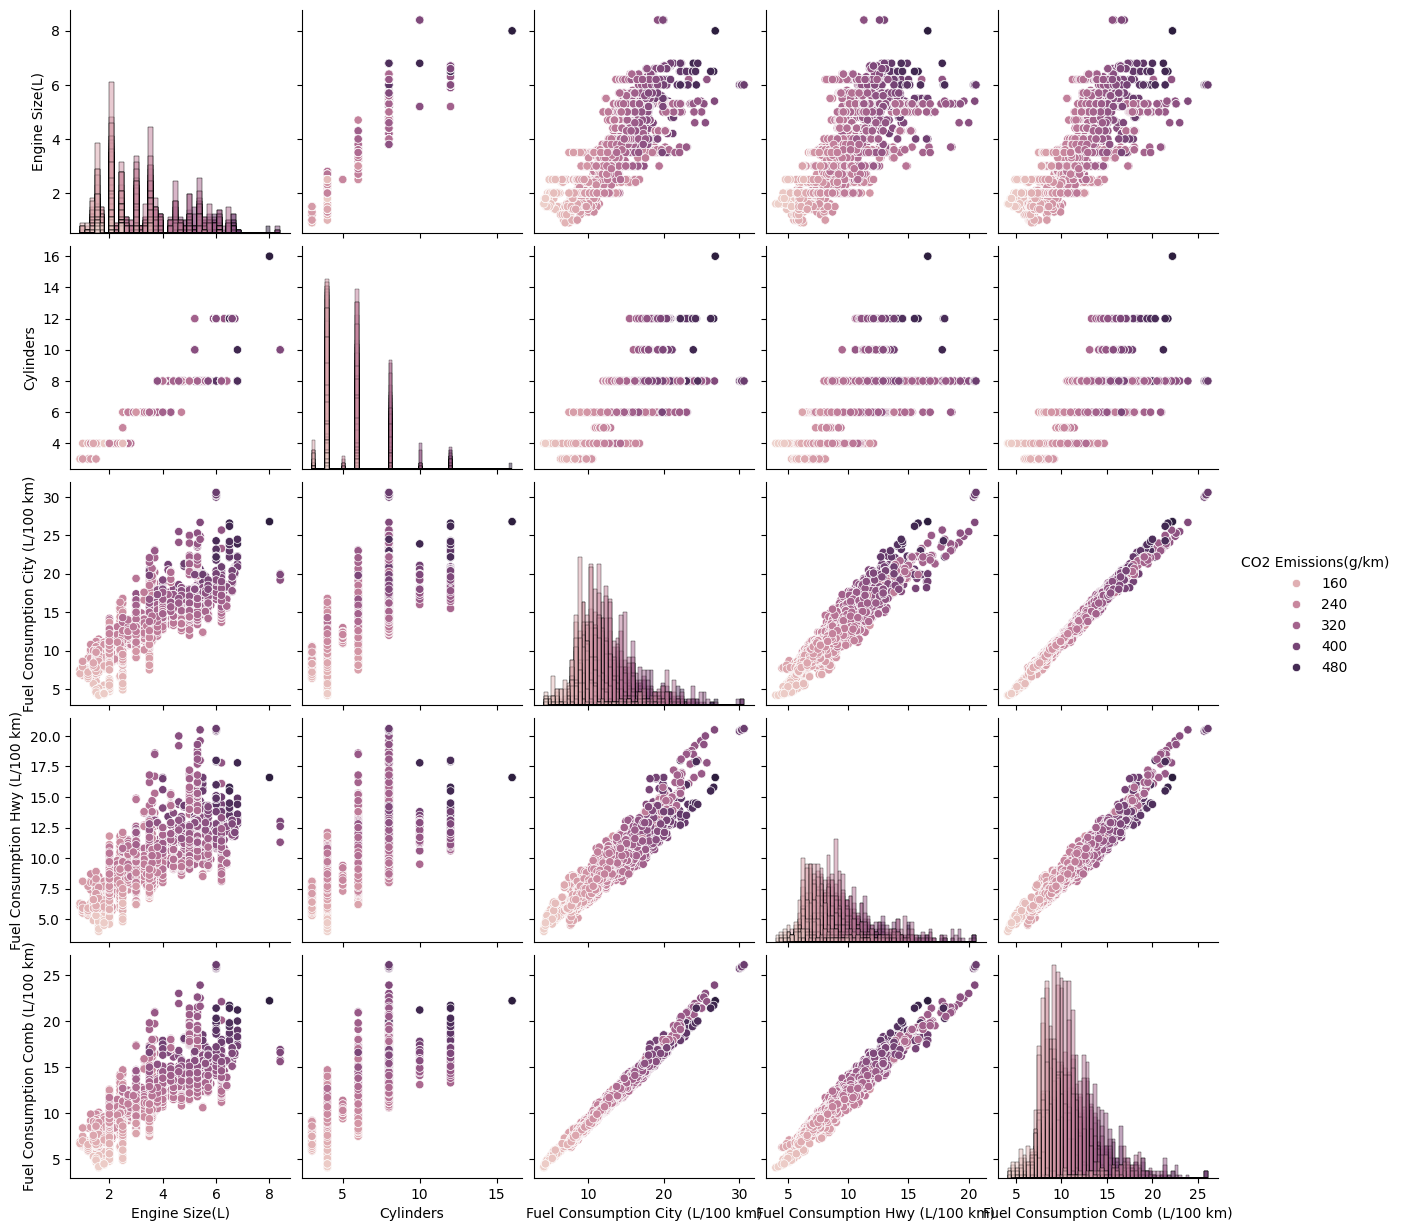

In [396]:
import seaborn as sns
sns.pairplot(df, hue='CO2 Emissions(g/km)', diag_kind='hist')

In [9]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print('Correlación de las variables con la variable objetivo')
print(correlation_matrix['CO2 Emissions(g/km)'])

Correlación de las variables con la variable objetivo
Engine Size(L)                      0.854802
Cylinders                           0.834687
Fuel Consumption City (L/100 km)    0.918756
Fuel Consumption Hwy (L/100 km)     0.883424
Fuel Consumption Comb (L/100 km)    0.916840
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64


Observamos que todas las variables numéricas están fuertemente correlacionadas con la variable objetivo.

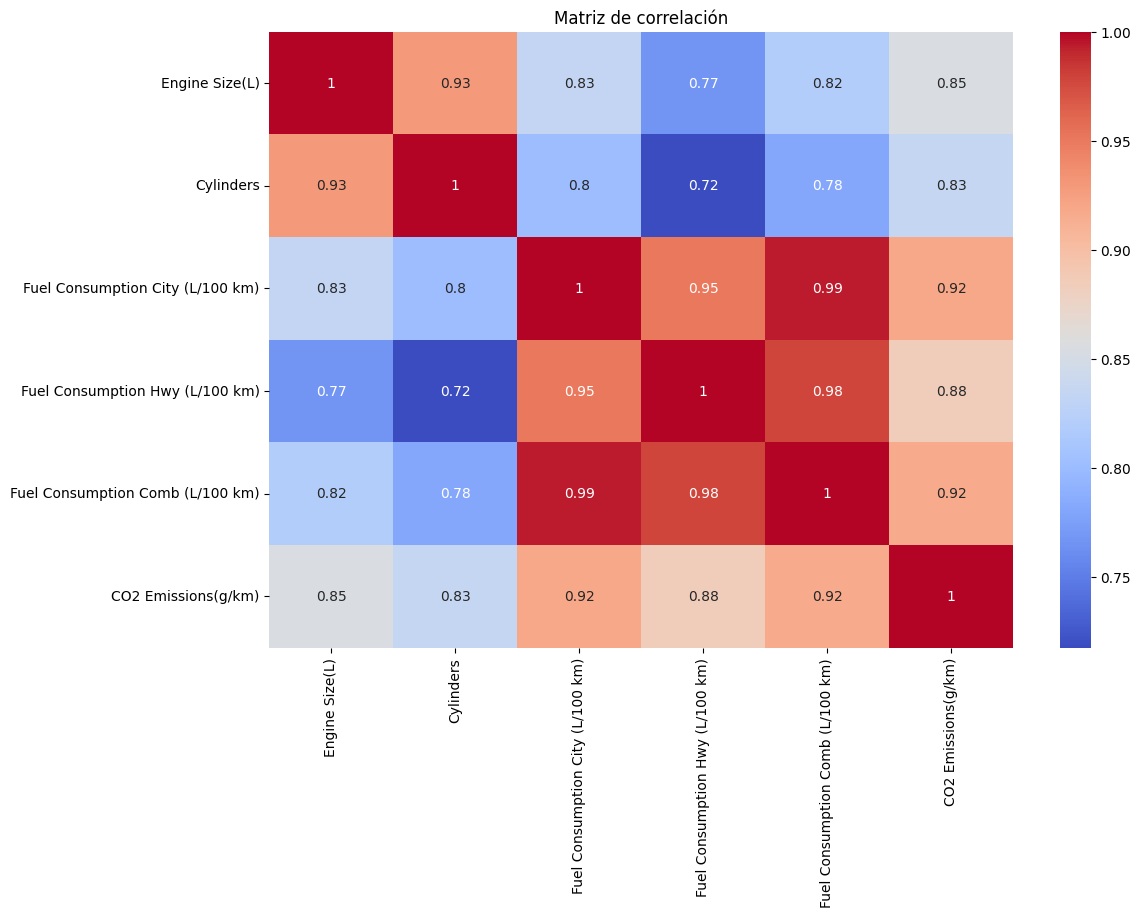

In [398]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Estudiamos tambien algunas variables categóricas que consideramos interesantes como el tipo de combustible.

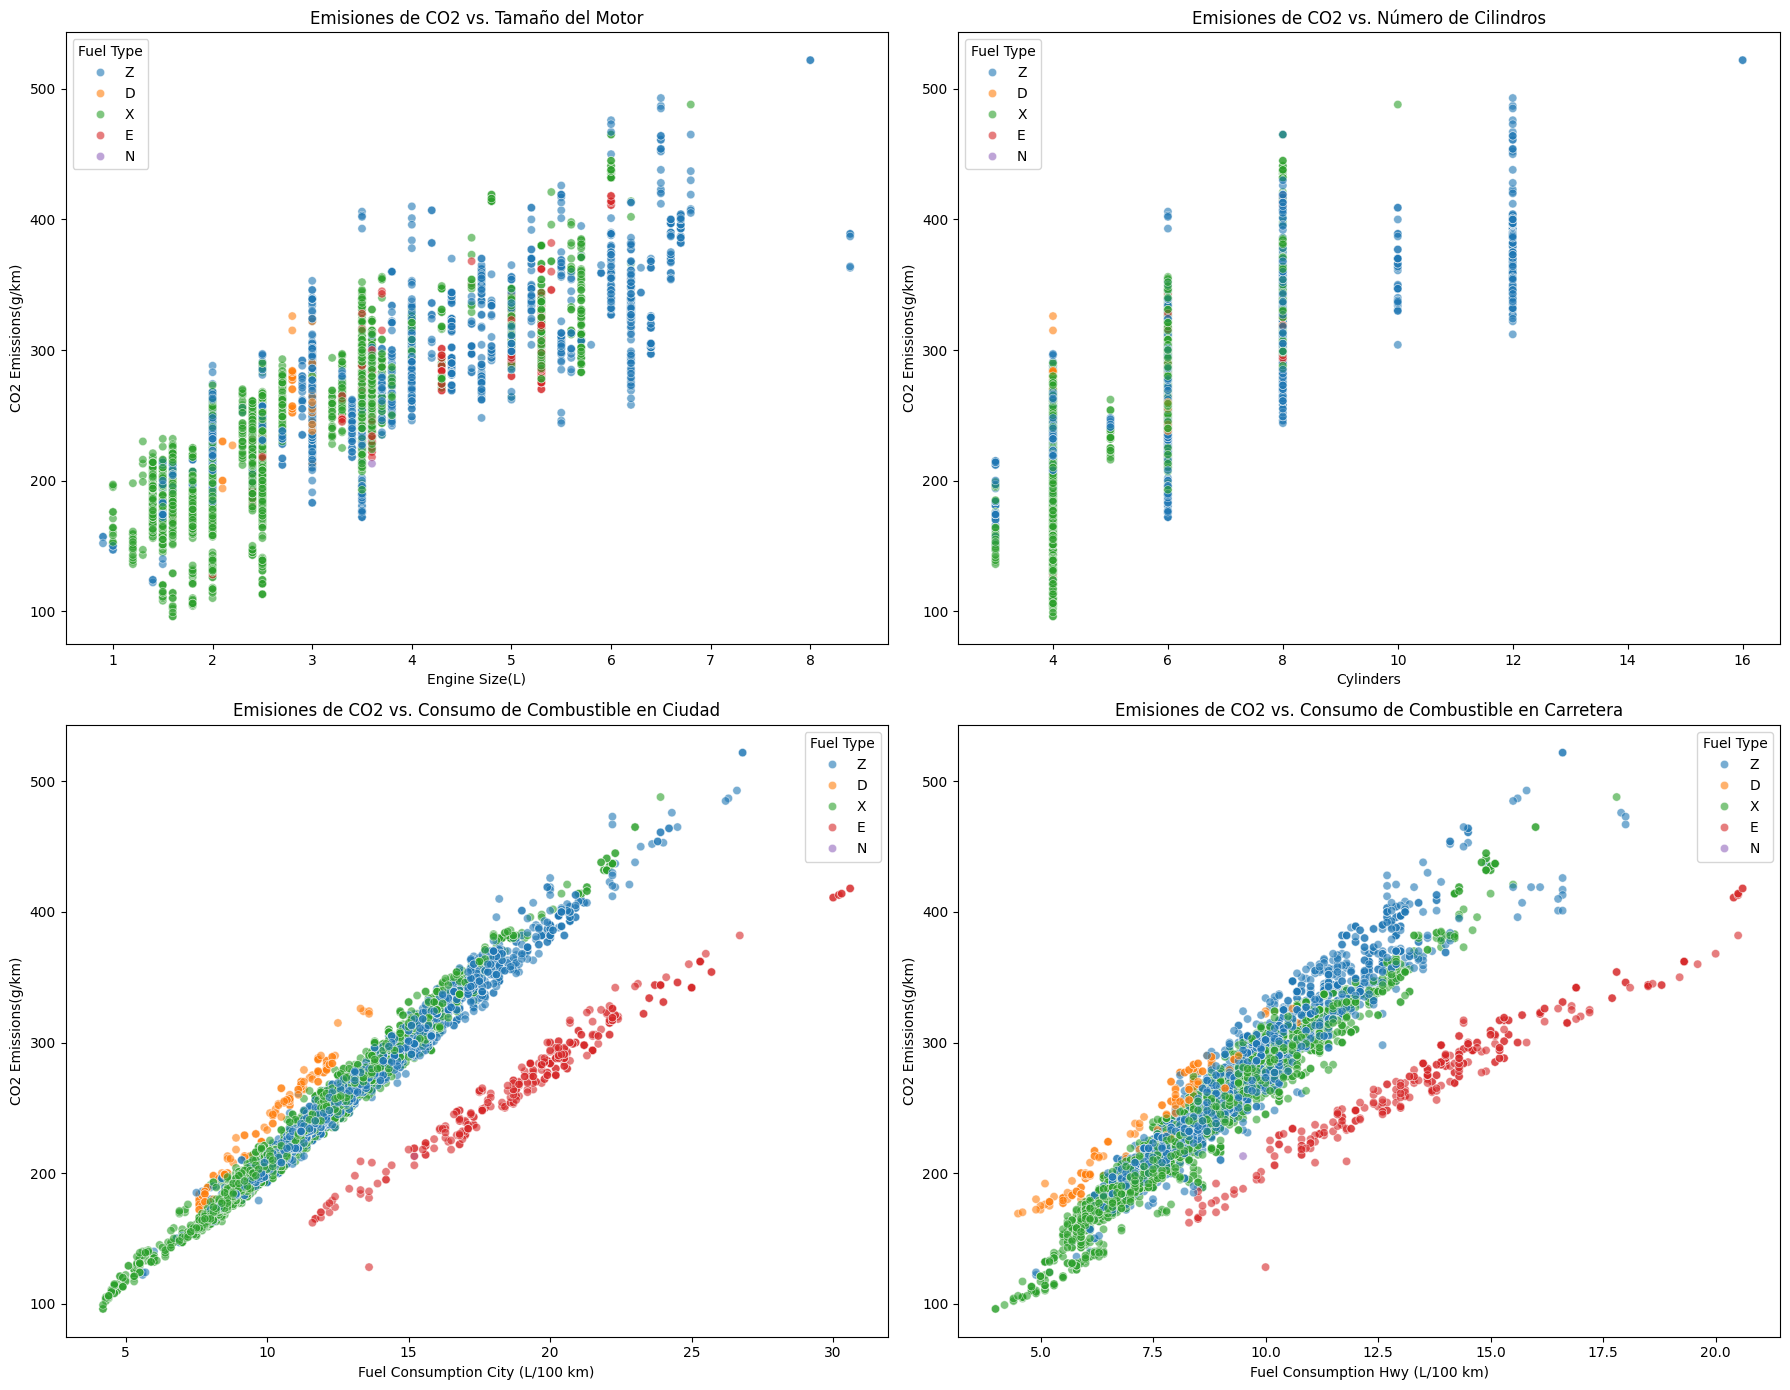

In [399]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.scatterplot(data=df, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type', alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Emisiones de CO2 vs. Tamaño del Motor')

sns.scatterplot(data=df, x='Cylinders', y='CO2 Emissions(g/km)', hue='Fuel Type', alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Emisiones de CO2 vs. Número de Cilindros')

sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Emisiones de CO2 vs. Consumo de Combustible en Ciudad')

sns.scatterplot(data=df, x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Emisiones de CO2 vs. Consumo de Combustible en Carretera')

plt.tight_layout()
plt.show()


Observamos que hay diferencias marcadas entre el tipo de combustible y la emisión de CO2...

## **Estudio de atípicos**

A continuación mostramos un boxplot donde se pueden ver los outliers de cada variable.

Text(0.5, 1.0, 'Outliers de las variables')

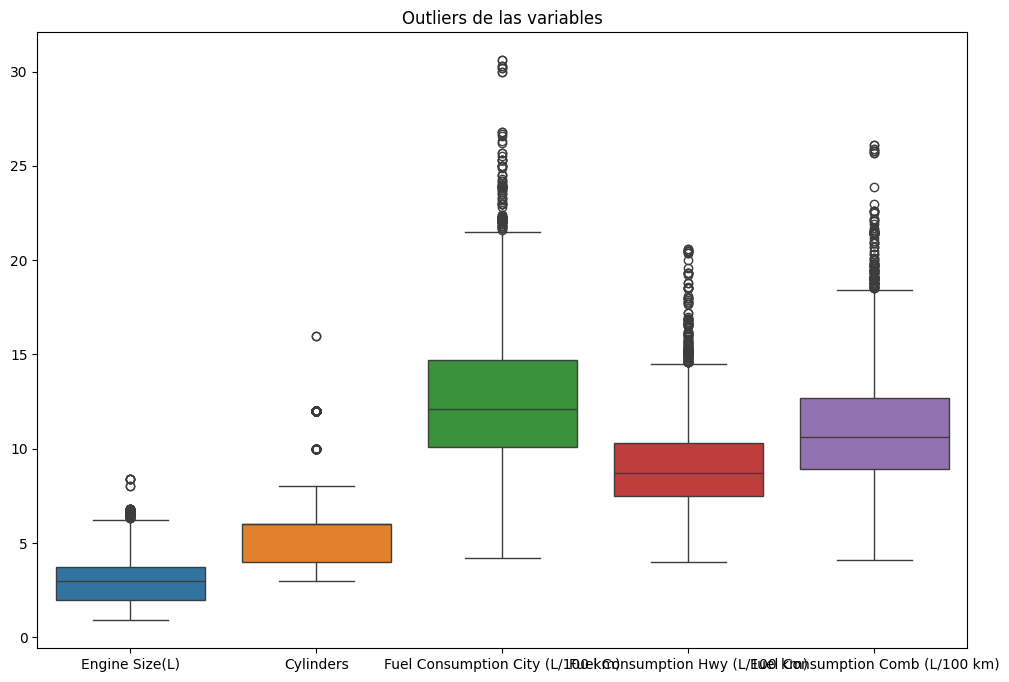

In [400]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('CO2 Emissions(g/km)', axis=1))
plt.title('Outliers de las variables')

Observamos que contamos con varios valores atípicos por lo que vamos a tratar de afrontar el problema usando distintas aproximaciones: 

* **Aproximación1:** vamos a tratar de crear un modelo empleando el dataset con el conjunto de datos completo (teniendo encuenta atípicos).

* **Aproximación 2:** Vamos a limpiar el dataset para eliminar atípicos empleando el método del Rango intercuartílico (IQR). El rango intercuartílico se define como Q3–Q1, y los datos que quedan fuera de Q3+1,5*IQR o de Q1-1,5*IQR se eliminan.

* **Aproximación 3:** Vamos a limpiar el dataset para eliminar atípicos empleando el método de z-score. Los z-score, representan el número de desviaciones estándar que un punto particular se encuentra lejos de la media. Este método asume distribución normal y es sensible al tamaño de la muestra.

## Modelado y evaluación
*En base al entendimiento del problema y los datos, establecer un plan preliminar del proyecto. ¿Qué abordaje se seguirá? ¿Qué algoritmos se consideran adecuados para alcanzar con los objetivos? Se sugiere seleccionar y justificar 3 modelos diferentes a desarrollar.*




*1. Regresión Lineal: Podemos utilizar este tipo de algoritmo cuando la relación entre variables independientes y la dependiente (CO2), se puede aproximar de manera lineal*

*2. Árbol de Decisión: Buen algortimo para capturar relaciones no lineales y segmentar los datos*

*3. Random Forest: Conjunto de árboles de decisión que mejora la precisión con el promedio de varios árboles, reduciendo el riesgo de sobreajuste*

### **Aproximación 1**

Vamos a emplear todo el conjunto de datos con las variables numéricas y la variable categórica tipo de combustible sin eliminar atípicos.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Separamos datos de entrenamiento y prueba
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

# Aplicar one-hot encoding solo a 'Fuel Type'
X_encoded = pd.get_dummies(X, columns=['Fuel Type'], drop_first=True)

# Seleccionar columnas numéricas originales y las generadas por 'Fuel Type'
numeric_columns = X.select_dtypes(include=['number']).columns  # Columnas numéricas
fuel_type_columns = [col for col in X_encoded.columns if 'Fuel Type' in col]  # Columnas de 'Fuel Type'

# Combinar las columnas numéricas y las de 'Fuel Type'
selected_columns = list(numeric_columns) + fuel_type_columns
X = X_encoded[selected_columns]

# Dividir datos en entrenamiento y prueba y escalarlos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [14]:
# Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Regresión Lineal - MSE:', mse)
print('Regresión Lineal - R2:', r2)

# Árboles de Decisión
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Árbol de Decisión - MSE:', mse)
print('Árbol de Decisión - R2:', r2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest - MSE:', mse)
print('Random Forest - R2:', r2)

Regresión Lineal - MSE: 45.39089277487964
Regresión Lineal - R2: 0.9874218917119548
Árbol de Decisión - MSE: 19.312408018247222
Árbol de Decisión - R2: 0.9946484075437516
Random Forest - MSE: 17.27749320969828
Random Forest - R2: 0.9952122955233473


Como dijimos anteriormente estamos empleando el conjunto de datos al completo, es decir sin eliminar esos datos atípicos que observávamos en el boxplot. Las conclusiones que sacamos son las siguientes: 

Como podemos observar, la regresión lineal funciona bien pero no nos ofrece el mejor resultado, esto puede deberse a que como vimos en los gráficos hay variables que presentan una relación lineal pero hay otras que no y un modelo lineal no puede capturar las no linealidades de las otras variables. 

El Árbol de Decisión nos ofrece un mayor R2, probablemente porque puede capturar esas relaciones no lineales.

Finalmente, Random Forest tiene el mejor desempeño general. Es algo que ya nos esperábamos ya que este modelo combina múltiples árboles de decisión para reducir el error y evitar sobreajustes.

Por ello concluimos, que aparentemente no eliminar los datos atípicos no quita desempeño en nuestro modelo.

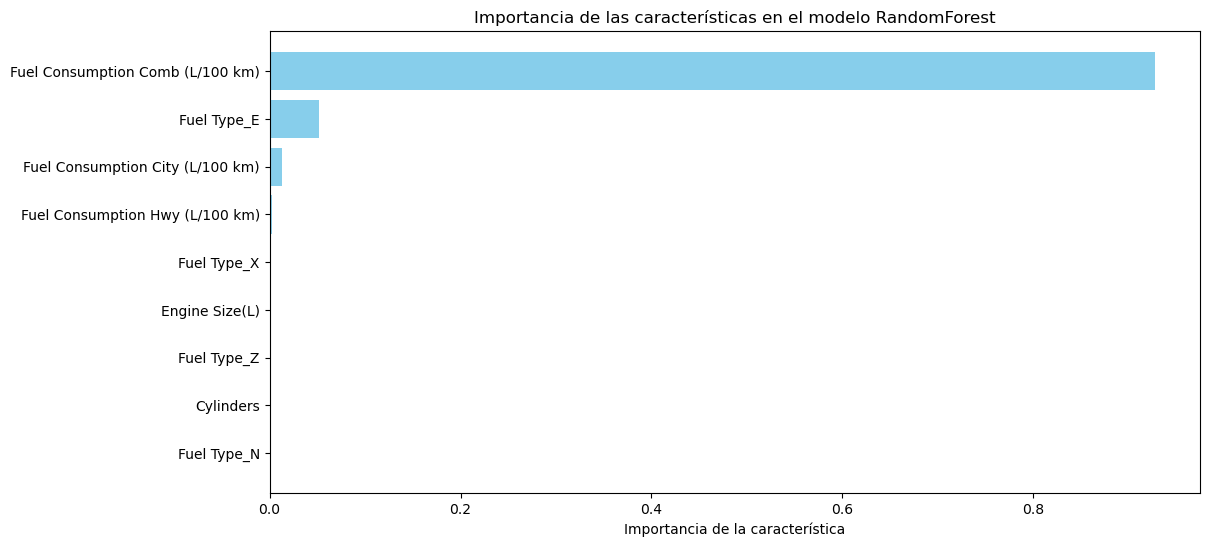

In [42]:
# Obtener la importancia de las características del modelo RandomForest
features_df = pd.DataFrame({
    'Feature': rf.feature_names_in_,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en el modelo RandomForest')
plt.gca().invert_yaxis()
plt.show()

Como podemos observar, el gráfico de barras representa cómo Random Forest prioriza las variables directamente relacionadas con las emisiones de CO2 para una predicción más precisa. 

Por lo que basándonos en estos datos, las características con mayor importancia son el consumo de combustible (lo que implica más emisiones), el consumo en ciudad y carretera ya que explican los patrones específicos de consumo en diferentes condiciones. Engloba el consumo general del vehículo y tiene una correlación directa con las emisiones de CO2. 

Además dependiendo del tipo de combustible, tendrán diferentes huellas de carbono, así como, dependiendo de las dimensiones del motor o cilindrada, emitirán más o menos CO2. Motores más grandes queman más combustible para generar más energía, lo que aumenta las emisiones pero no es un factor directo ya que algunos optimizan su consumo a pesar del tamaño.

A continuación vamos a estudiar si la eliminacion de datos atípicos es beneficiosa.

### **Aproximación 2**

 Utilizamos el rango intercuartílico para los valores atípicos

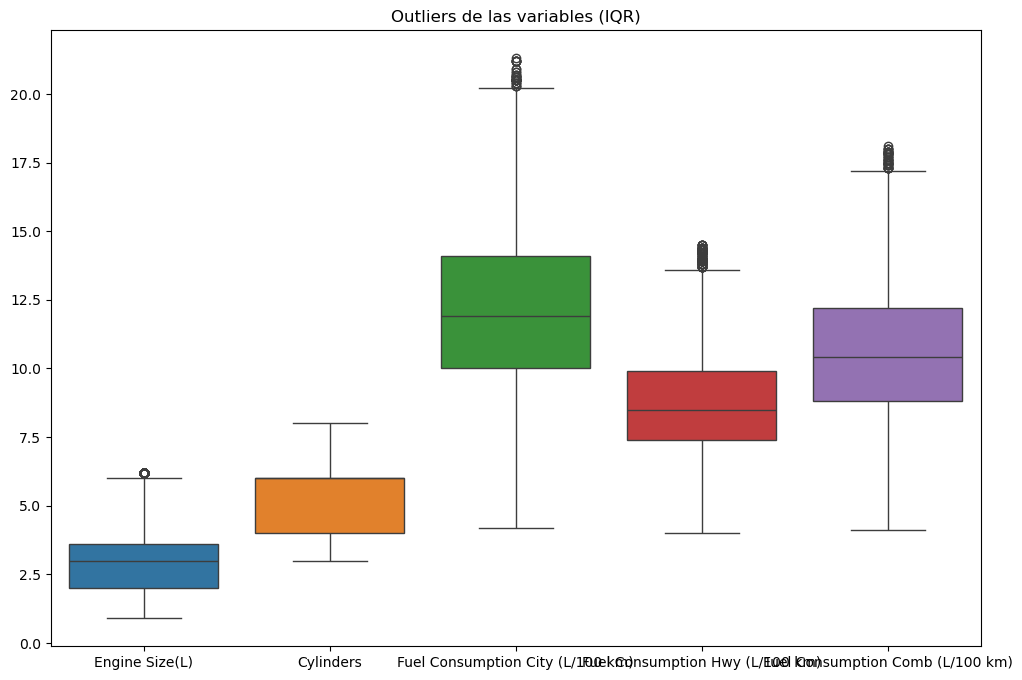

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo del rango intercuartílico (IQR) para cada variable numérica
#que incluya todas las variables numéricas menos la variable objetivo


Q1 = df.select_dtypes(include=['number']).quantile(0.25)  # Primer cuartil
Q3 = df.select_dtypes(include=['number']).quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Identificación de valores atípicos: cualquier dato fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear máscaras para identificar datos atípicos y datos filtrados
outlier_mask = ((df.select_dtypes(include=['number']) < lower_bound) | 
                (df.select_dtypes(include=['number']) > upper_bound)).any(axis=1)
filtered_mask = ~outlier_mask

# Filtrar el dataframe
df_filtered = df[filtered_mask]
df_outliers = df[outlier_mask]

# Visualización de datos sin atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered.drop('CO2 Emissions(g/km)', axis=1, errors='ignore'))
plt.title('Outliers de las variables (IQR)')
plt.show()


In [16]:
print('El dataset original cuenta con', df.shape[0], 'observaciones')
print('El dataset filtrado cuenta con', df_filtered.shape[0], 'observaciones')
print('El dataset con outliers cuenta con', df_outliers.shape[0], 'observaciones')

El dataset original cuenta con 6282 observaciones
El dataset filtrado cuenta con 5911 observaciones
El dataset con outliers cuenta con 371 observaciones


Como podemos observar empleando el método del rango intercuartílico eliminamos 371 muestras, aunque seguimos contando con algunos atípicos en algunas variables.

Tratamos de encontrar un patrón dentro de las muestras consideradas atípicas.

<Axes: xlabel='Make'>

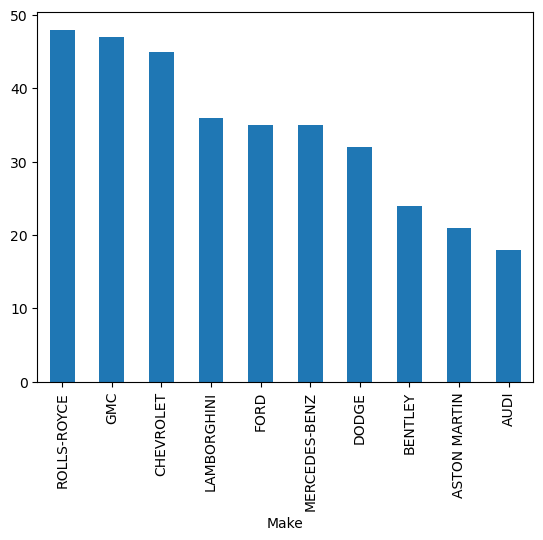

In [37]:
df_outliers.groupby('Make').size().sort_values(ascending=False).head(10).plot(kind='bar')

Observamos que la mayor parte son coches de alta gama como rolls-royce, bentley, chervolet, ... aunque también nos encontramos algún ford, como dijimos anteriormente era la marca de la que más muestras poseíamos.

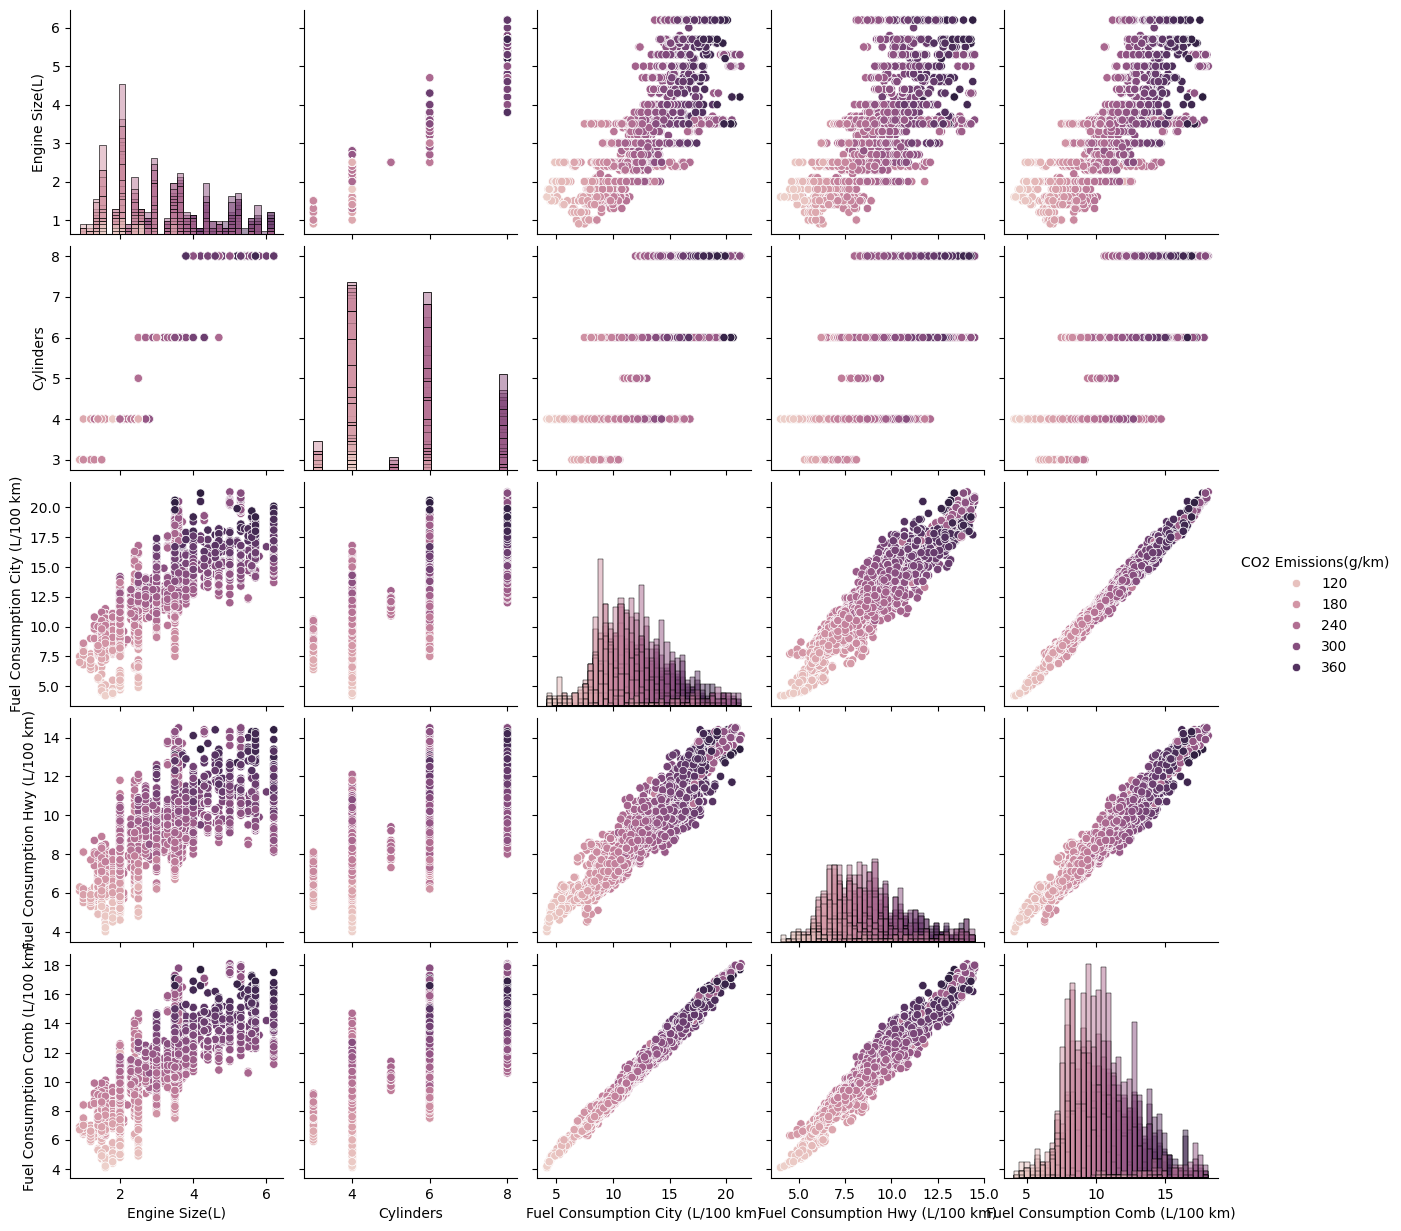

In [403]:
sns.pairplot(df_filtered, hue='CO2 Emissions(g/km)', diag_kind='hist')

### Dataset filtrado: sin outliers

Vamos a tratar de ajustar un buen modelo que prediga el CO2 con las muestras que no consideramos atípicas.

In [23]:
X = df_filtered.drop('CO2 Emissions(g/km)', axis=1)
y = df_filtered['CO2 Emissions(g/km)']

# Aplicar one-hot encoding solo a 'Fuel Type'
X_encoded = pd.get_dummies(X, columns=['Fuel Type'], drop_first=True)

# Seleccionar columnas numéricas originales y las generadas por 'Fuel Type'
numeric_columns = X.select_dtypes(include=['number']).columns  # Columnas numéricas
fuel_type_columns = [col for col in X_encoded.columns if 'Fuel Type' in col]  # Columnas de 'Fuel Type'

# Combinar las columnas numéricas y las de 'Fuel Type'
selected_columns = list(numeric_columns) + fuel_type_columns
X_filtered = X_encoded[selected_columns]

# Dividir datos en entrenamiento y prueba y escalarlos
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [25]:
# Regresión Lineal
lr_ri_f = LinearRegression()
lr_ri_f.fit(X_train, y_train)
y_pred = lr_ri_f.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Regresión Lineal - MSE:', mse)
print('Regresión Lineal - R2:', r2)

# Árboles de Decisión
dt_ri_f = DecisionTreeRegressor()
dt_ri_f.fit(X_train, y_train)
y_pred = dt_ri_f.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Árbol de Decisión - MSE:', mse)
print('Árbol de Decisión - R2:', r2)

# Random Forest
rf_ri_f = RandomForestRegressor()
rf_ri_f.fit(X_train, y_train)
y_pred = rf_ri_f.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest - MSE:', mse)
print('Random Forest - R2:', r2)

Regresión Lineal - MSE: 13.668895513256128
Regresión Lineal - R2: 0.9950366772432023
Árbol de Decisión - MSE: 13.813409091426427
Árbol de Decisión - R2: 0.9949842028109774
Random Forest - MSE: 10.857789243330886
Random Forest - R2: 0.9960574201194475


Obtenemos resultados similares a emplear todo el conjunto de datos. De nuevo, el mejor modelo en términos de MSE y R² se obtiene empleando Random Forest, mostrando la mayor precisión.
La desventaja de plantear un modelo de este tipo es que si le llega alguna muestra fuera del conjunto de datos visto no nos va a ofrecer un resultado muy preciso.

#### Dataset filtrado: outliers

Para aquellos casos que consideramos atípicos vamos a tratar de crear un modelo para que en caso de que la prediccion con el modelo anterior sea mala, podamos emplear este modelo ofrecuiendo una mayor precisión.

In [33]:
X = df_outliers.drop('CO2 Emissions(g/km)', axis=1)
y = df_outliers['CO2 Emissions(g/km)']

# Aplicar one-hot encoding solo a 'Fuel Type'
X_encoded = pd.get_dummies(X, columns=['Fuel Type'], drop_first=True)

# Seleccionar columnas numéricas originales y las generadas por 'Fuel Type'
numeric_columns = X.select_dtypes(include=['number']).columns  # Columnas numéricas
fuel_type_columns = [col for col in X_encoded.columns if 'Fuel Type' in col]  # Columnas de 'Fuel Type'

# Combinar las columnas numéricas y las de 'Fuel Type'
selected_columns = list(numeric_columns) + fuel_type_columns
X_outliers = X_encoded[selected_columns]

# Dividir datos en entrenamiento y prueba y escalarlos
X_train, X_test, y_train, y_test = train_test_split(X_outliers, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [34]:
# Regresión Lineal
lr_ri_o = LinearRegression()
lr_ri_o.fit(X_train, y_train)
y_pred = lr_ri_o.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Regresión Lineal - MSE:', mse)
print('Regresión Lineal - R2:', r2)

# Árboles de Decisión
dt_ri_o = DecisionTreeRegressor()
dt_ri_o.fit(X_train, y_train)
y_pred = dt_ri_o.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Árbol de Decisión - MSE:', mse)
print('Árbol de Decisión - R2:', r2)

# Random Forest
rf_ri_o = RandomForestRegressor()
rf_ri_o.fit(X_train, y_train)
y_pred = rf_ri_o.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest - MSE:', mse)
print('Random Forest - R2:', r2)

Regresión Lineal - MSE: 70.76766517947168
Regresión Lineal - R2: 0.9668379261359958
Árbol de Decisión - MSE: 28.086874074074075
Árbol de Decisión - R2: 0.9868383535009769
Random Forest - MSE: 85.2712772408108
Random Forest - R2: 0.9600414626204451


En este caso, es el árbol de decision el que nos ofrece mejores resultados, a pesar de que el R2 sea elevado podemos observar que el MSE también a crecido bastante, por lo que podemos decir que no es un modelo que nos ofrezca mucha confianza.

### **Aproximación 3:** 

Utilizamos z-scores para los atípicos

Text(0.5, 1.0, 'Outliers de las variables')

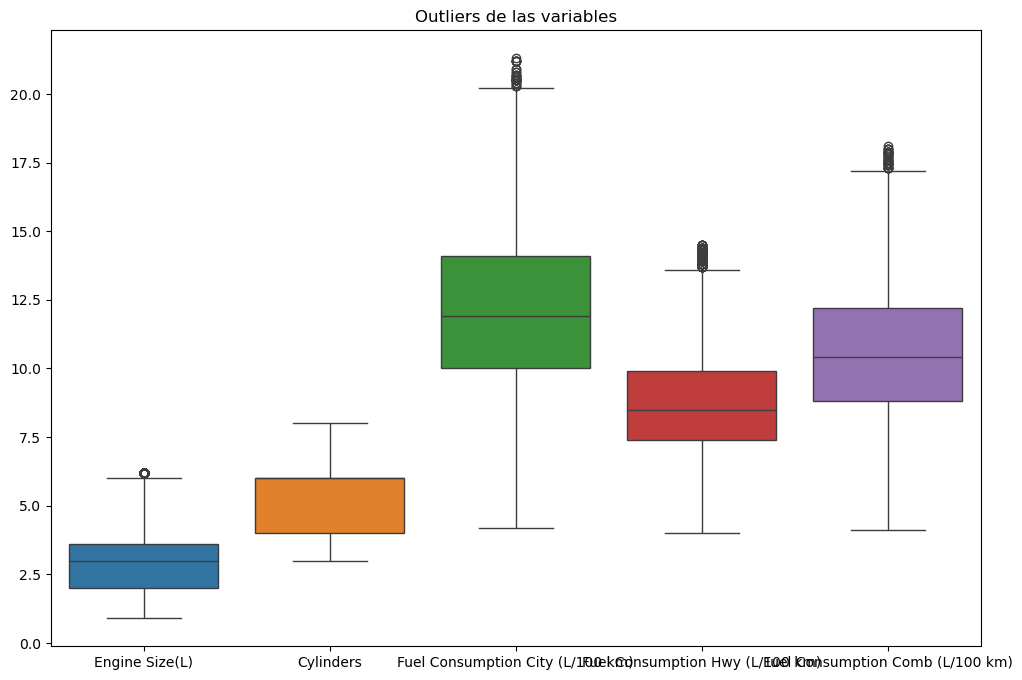

In [35]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(df.select_dtypes(include=['number']))
abs_z_scores = np.abs(z_scores)
atipicos=(abs_z_scores >= 3).any(axis=1)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_filtered_zs = df[filtered_entries]
df_atipicos_zs = df[atipicos]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered.drop('CO2 Emissions(g/km)', axis=1))
plt.title('Outliers de las variables')


In [36]:
print('El dataset original cuenta con', df.shape[0], 'observaciones')
print('El dataset filtrado cuenta con', df_filtered_zs.shape[0], 'observaciones')
print('El dataset con outliers cuenta con', df_atipicos_zs.shape[0], 'observaciones')

El dataset original cuenta con 6282 observaciones
El dataset filtrado cuenta con 6055 observaciones
El dataset con outliers cuenta con 227 observaciones


En este caso eliminamos 277 observaciones. 

De nuevo, tratamos de encontrar un patrón en los valores que consideramos atípicos.

<Axes: xlabel='Make'>

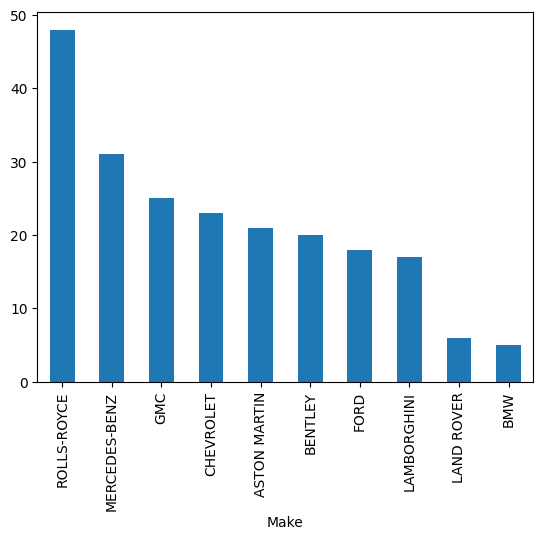

In [412]:
df_atipicos_zs.groupby('Make').size().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Cylinders'>

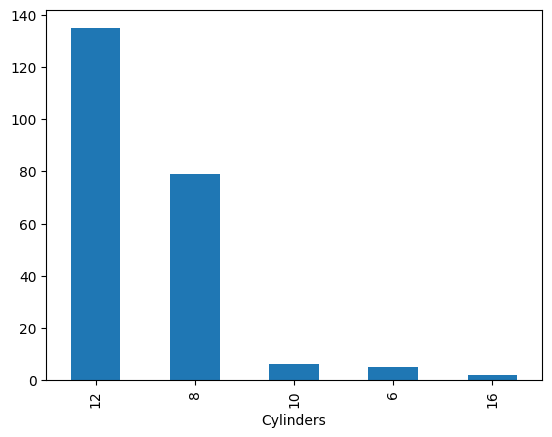

In [413]:
df_atipicos_zs.groupby('Cylinders').size().sort_values(ascending=False).head(10).plot(kind='bar')

Repetimos el mismo proceso de modelado y evaluación empleando los nuevos datasets bajo el criterio de z-score.

### Dataset filtrado: sin outliers

In [38]:
# Separar datos de entrenamiento y prueba
X = df_filtered_zs.drop('CO2 Emissions(g/km)', axis=1)
y = df_filtered_zs['CO2 Emissions(g/km)']

# Aplicar one-hot encoding solo a 'Fuel Type'
X_encoded = pd.get_dummies(X, columns=['Fuel Type'], drop_first=True)

# Seleccionar columnas numéricas originales y las generadas por 'Fuel Type'
numeric_columns = X.select_dtypes(include=['number']).columns  # Columnas numéricas
fuel_type_columns = [col for col in X_encoded.columns if 'Fuel Type' in col]  # Columnas de 'Fuel Type'

# Combinar las columnas numéricas y las de 'Fuel Type'
selected_columns = list(numeric_columns) + fuel_type_columns
X_filtered_zs = X_encoded[selected_columns]

# Dividir datos en entrenamiento y prueba y escalarlos
X_train, X_test, y_train, y_test = train_test_split(X_filtered_zs, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [39]:
# Regresión Lineal
lr_zs_f = LinearRegression()
lr_zs_f.fit(X_train, y_train)
y_pred = lr_zs_f.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Regresión Lineal - MSE:', mse)
print('Regresión Lineal - R2:', r2)

# Árboles de Decisión
dt_zs_f = DecisionTreeRegressor()
dt_zs_f.fit(X_train, y_train)
y_pred = dt_zs_f.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Árbol de Decisión - MSE:', mse)
print('Árbol de Decisión - R2:', r2)

# Random Forest
rf_zs_f = RandomForestRegressor()
rf_zs_f.fit(X_train, y_train)
y_pred = rf_zs_f.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest - MSE:', mse)
print('Random Forest - R2:', r2)

Regresión Lineal - MSE: 16.146357356327858
Regresión Lineal - R2: 0.994386557184387
Árbol de Decisión - MSE: 17.28816243753296
Árbol de Decisión - R2: 0.993989597214502
Random Forest - MSE: 12.81352424220033
Random Forest - R2: 0.9955452499896595


De nuevo el mejor modelo se obtiene con random forest, no mejoramos los resultados obtenidos con la primera aproximación.

### Dataset filtrado: outliers

In [40]:
# Separamos datos de entrenamiento y prueba
X = df_atipicos_zs.drop('CO2 Emissions(g/km)', axis=1)
y = df_atipicos_zs['CO2 Emissions(g/km)']

# Aplicar one-hot encoding solo a 'Fuel Type'
X_encoded = pd.get_dummies(X, columns=['Fuel Type'], drop_first=True)

# Seleccionar columnas numéricas originales y las generadas por 'Fuel Type'
numeric_columns = X.select_dtypes(include=['number']).columns  # Columnas numéricas
fuel_type_columns = [col for col in X_encoded.columns if 'Fuel Type' in col]  # Columnas de 'Fuel Type'

# Combinar las columnas numéricas y las de 'Fuel Type'
selected_columns = list(numeric_columns) + fuel_type_columns
X_atipicos_zs = X_encoded[selected_columns]

# Dividir datos en entrenamiento y prueba y escalarlos
X_train, X_test, y_train, y_test = train_test_split(X_atipicos_zs, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [41]:
# Regresión Lineal
lr_zs_o = LinearRegression()
lr_zs_o.fit(X_train, y_train)
y_pred = lr_zs_o.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Regresión Lineal - MSE:', mse)
print('Regresión Lineal - R2:', r2)

# Árboles de Decisión
dt_zs_o = DecisionTreeRegressor()
dt_zs_o.fit(X_train, y_train)
y_pred = dt_zs_o.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Árbol de Decisión - MSE:', mse)
print('Árbol de Decisión - R2:', r2)

# Random Forest
rf_zs_o = RandomForestRegressor()
rf_zs_o.fit(X_train, y_train)
y_pred = rf_zs_o.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest - MSE:', mse)
print('Random Forest - R2:', r2)

Regresión Lineal - MSE: 56.453041332740284
Regresión Lineal - R2: 0.9677718939030733
Árbol de Decisión - MSE: 427.99369565217387
Árbol de Decisión - R2: 0.7556654892870325
Random Forest - MSE: 314.4661073518387
Random Forest - R2: 0.8204765087519748


En este caso obtenemos mejores resultados con Regresión lineal, esto puede deberse a que los datos atípicos guardan una relacion lineal, eliminando las linealidades que tenemos al emplear todo el conjunto de datos y hace tenga una mejor precisión.

## **Conclusiones**

Creemos que la eliminación de datos atípicos no ofrece ninguna mejora sustancial al rendimiento de los modelos. Al eliminar atípcios estaremos cometiendo errores al tratar de predecir la cantidad de Co2 que emiten los coches de alta gama y si tratamos de generar dos modelos cometemos un mayor error cuadrático medio, por lo que nos quedamos con la primera aproximación.

# Producción
*Deberán desarrollar una función que recibirá un registro único de datos y deberá devolver el valor de CO2 estimado. Esta función debe "cargar" el modelo generado anteriormente sin necesidad de pasar por las etapas de aprendizaje.*

La función a continuación va a tomar un conjunto de las diferentes características del vehículo y va a utilizar el modelo de Random Forest para predecir las emisiones de CO2. El valor que va a predecir es una medida directa del impacto ambiental del vehículo basado en las características proporcionadas como entrada.

In [43]:
def predecir_co2(engine_size, cylinders, fuel_type, fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_comb):
    # Crear un DataFrame con los datos de entrada
    data = {
        'Engine Size(L)': [engine_size],
        'Cylinders': [cylinders],
        'Fuel Type': [fuel_type],
        'Fuel Consumption City (L/100 km)': [fuel_consumption_city],
        'Fuel Consumption Hwy (L/100 km)': [fuel_consumption_hwy],
        'Fuel Consumption Comb (L/100 km)': [fuel_consumption_comb]
    }
    df = pd.DataFrame(data)
    df_encoded = pd.get_dummies(df, columns=['Fuel Type'], drop_first=True)

    # Seleccionar columnas numéricas y las generadas por 'Fuel Type' para asegurar la consistencia con el entrenamiento
    numeric_columns = df.select_dtypes(include=['number']).columns
    fuel_type_columns = [col for col in df_encoded.columns if 'Fuel Type' in col]
    selected_columns = list(numeric_columns) + fuel_type_columns
    df_encoded = df_encoded[selected_columns]

    # Asegurar que el orden de las columnas coincida con el modelo y agregar columnas faltantes si es necesario
    expected_columns = rf.feature_names_in_
    for col in expected_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0  # Agregar columnas faltantes con valores 0

    # Reordenar las columnas de `df_encoded` para que coincidan con el orden de `expected_columns`
    df_encoded = df_encoded[expected_columns]

    # Aplicar la estandarización solo a las columnas numéricas usando el escalador previamente ajustado
    df_encoded[numeric_columns] = scaler.transform(df_encoded[numeric_columns])

    # Predicción
    return rf.predict(df_encoded)[0]

In [44]:
# Ejemplo de uso: 
# Introduzca la información de su coche:
prediction = predecir_co2(
    engine_size = 6.4,
    cylinders = 6,
    fuel_type = 'Z',
    fuel_consumption_city = 10.6,
    fuel_consumption_hwy = 6.9,
    fuel_consumption_comb = 8.7
)
print(f'Predicción de emisiones de CO2: {prediction:.2f} g/km')

Predicción de emisiones de CO2: 97.09 g/km


El modelo escogido estima las emisiones de CO2 utilizando un conjunto de árboles de decisión. Cada árbol individualmente hará una predicción basada en divisiones iterativas de las características y el resultado va a ser la media de dichas predicciones, evitando así el sobreajuste. 

Con nuestro ejemplo de uso y las características proporcionadas, obtenemos que la cantidad estimada de CO2 emitida por cada kilómetro recorrido es de 210.56 gramos. 